In [86]:
import pandas as pd
# Assuming 'identifier' is the column name and 'L2_Distance' is the column with the distance values
subset_sizes = [10, 50, 100, 150, 200]

In [87]:
df_laplace01 = pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\laplace\\merged_laplace_0.1.csv')

  # Add more sizes as needed
averages_l2_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplace01.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_laplace[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_laplace[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l2_laplace.items()}
overall_averages_l1_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l1_laplace.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_laplace = list(overall_averages_l2_laplace.values())
overall_averages_l1_laplace = list(overall_averages_l1_laplace.values())
# This will be your list of overall averages
#print(overall_averages_l2_laplace)
#print(overall_averages_l1_laplace)
##########################################################################################################
df_staircase01 = pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\staircase\\merged_staircase_0.1.csv')

  # Add more sizes as needed
averages_l2_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_staircase01.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_staircase[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_staircase[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l2_staircase.items()}
overall_averages_l1_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l1_staircase.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_staircase = list(overall_averages_l2_staircase.values())
overall_averages_l1_staircase = list(overall_averages_l1_staircase.values())
# This will be your list of overall averages
#print(overall_averages_l2_staircase)
#print(overall_averages_l1_staircase)

#########################################################################################################

df_our_bl_50delta5_01 = pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\our_bl_50_delta_5\\merged_our_bl_50_delta_5_0.1.csv')

  # Add more sizes as needed
averages_l2_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_our_bl_50delta5_01.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_our_bl_50_delta_5[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_our_bl_50_delta_5[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_our_bl_50_delta_5.items()}
overall_averages_l1_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_our_bl_50_delta_5.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_our_bl_50_delta_5 = list(overall_averages_l2_our_bl_50_delta_5.values())
overall_averages_l1_our_bl_50_delta_5 = list(overall_averages_l1_our_bl_50_delta_5.values())
# This will be your list of overall averages
#print(overall_averages_l2_our_bl_50_delta_5)
#print(overall_averages_l1_our_bl_50_delta_5)

##############################################################################

df_laplaceDelta5_01= pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\laplace_delta_5\\merged_laplace_delta_5_0.1.csv')

  # Add more sizes as needed
averages_l2_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplaceDelta5_01.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_LaplaceDelta_5_01[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_LaplaceDelta_5_01[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_LaplaceDelta_5_01.items()}
overall_averages_l1_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_LaplaceDelta_5_01.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_LaplaceDelta_5_01 = list(overall_averages_l2_LaplaceDelta_5_01.values())
overall_averages_l1_LaplaceDelta_5_01 = list(overall_averages_l1_LaplaceDelta_5_01.values())
# This will be your list of overall averages
#print(overall_averages_l2_LaplaceDelta_5_01)
#print(overall_averages_l1_LaplaceDelta_5_01)

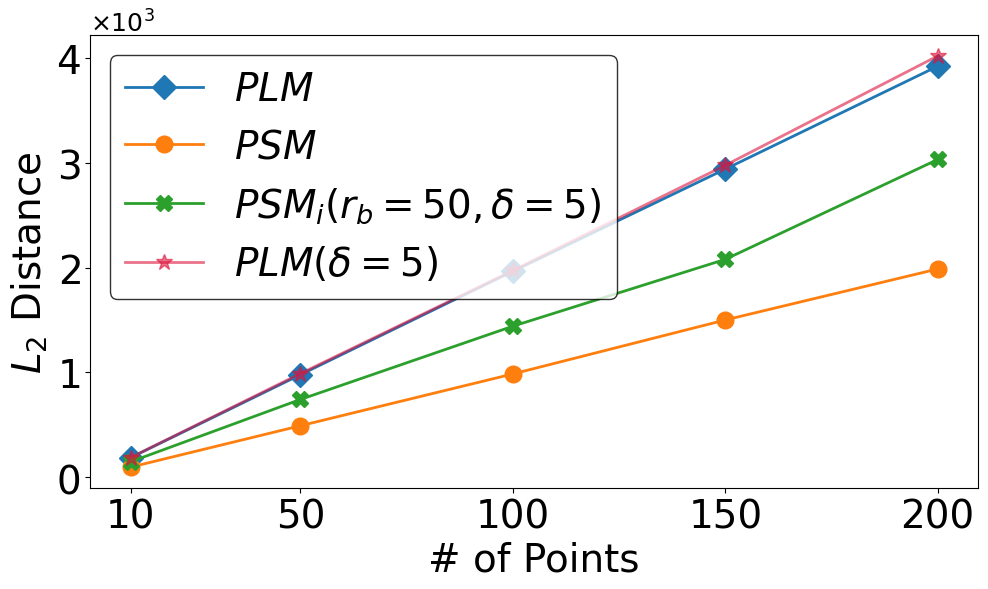

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l2_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l2_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l2_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l2_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_2$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

# Saving the plot as a high-definition PNG
pathpng = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\png\\uci_l2_distance_e=0_1'

plt.savefig(pathpng, dpi=300, bbox_inches='tight')

#Saving the plot as an SVG
pathsvg = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\svg\\uci_l2_distance_e=0_1'
plt.savefig(pathsvg, format='svg', bbox_inches='tight')

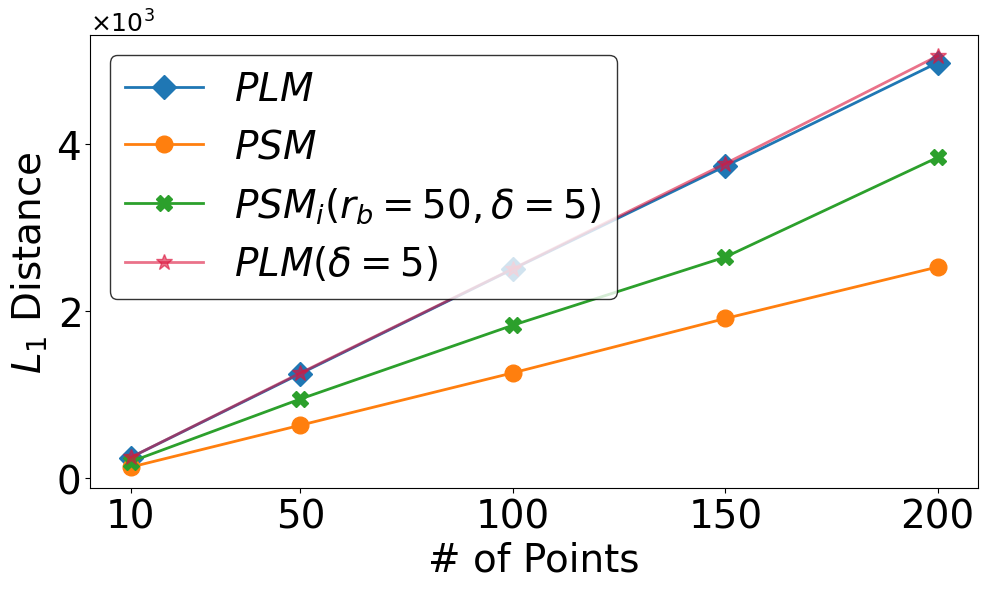

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l1_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l1_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l1_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l1_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_1$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

# Saving the plot as a high-definition PNG
pathpng = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\png\\uci_l1_distance_e=0_1'

plt.savefig(pathpng, dpi=300, bbox_inches='tight')

#Saving the plot as an SVG
pathsvg = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\svg\\uci_l1_distance_e=0_1'
plt.savefig(pathsvg, format='svg', bbox_inches='tight')

In [90]:
df_laplace1 = pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\laplace\\merged_laplace_1.csv')

  # Add more sizes as needed
averages_l2_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplace1.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_laplace[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_laplace[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l2_laplace.items()}
overall_averages_l1_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l1_laplace.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_laplace = list(overall_averages_l2_laplace.values())
overall_averages_l1_laplace = list(overall_averages_l1_laplace.values())
# This will be your list of overall averages
#print(overall_averages_l2_laplace)
#print(overall_averages_l1_laplace)

#############################################################################################

df_staircase1 = pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\staircase\\merged_staircase_1.csv')

  # Add more sizes as needed
averages_l2_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_staircase1.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_staircase[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_staircase[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l2_staircase.items()}
overall_averages_l1_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l1_staircase.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_staircase = list(overall_averages_l2_staircase.values())
overall_averages_l1_staircase = list(overall_averages_l1_staircase.values())
# This will be your list of overall averages
#print(overall_averages_l2_staircase)
#print(overall_averages_l1_staircase)


#####################################################
df_our_bl_50delta5_1 = pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\our_bl_50_delta_5\\merged_our_bl_50_delta_5_1.csv')

  # Add more sizes as needed
averages_l2_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_our_bl_50delta5_1.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_our_bl_50_delta_5[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_our_bl_50_delta_5[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_our_bl_50_delta_5.items()}
overall_averages_l1_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_our_bl_50_delta_5.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_our_bl_50_delta_5 = list(overall_averages_l2_our_bl_50_delta_5.values())
overall_averages_l1_our_bl_50_delta_5 = list(overall_averages_l1_our_bl_50_delta_5.values())
# This will be your list of overall averages
#print(overall_averages_l2_our_bl_50_delta_5)
#print(overall_averages_l1_our_bl_50_delta_5)

#######################################################

df_laplaceDelta5_1= pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\laplace_delta_5\\merged_laplace_delta_5_1.csv')

  # Add more sizes as needed
averages_l2_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplaceDelta5_1.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_LaplaceDelta_5_01[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_LaplaceDelta_5_01[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_LaplaceDelta_5_01.items()}
overall_averages_l1_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_LaplaceDelta_5_01.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_LaplaceDelta_5_01 = list(overall_averages_l2_LaplaceDelta_5_01.values())
overall_averages_l1_LaplaceDelta_5_01 = list(overall_averages_l1_LaplaceDelta_5_01.values())
# This will be your list of overall averages
#print(overall_averages_l2_LaplaceDelta_5_01)
#print(overall_averages_l1_LaplaceDelta_5_01)

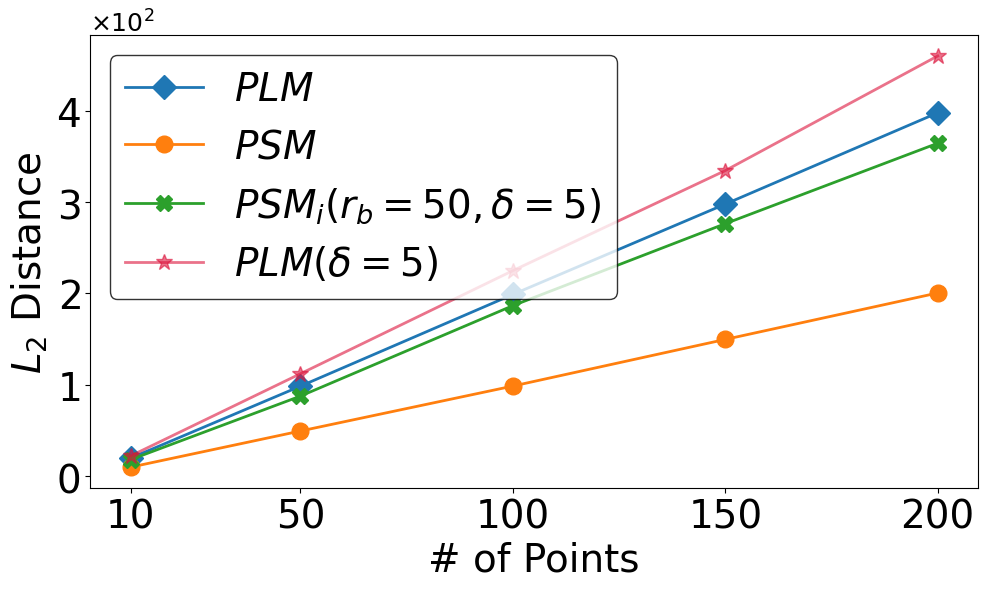

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l2_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l2_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l2_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l2_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_2$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()



pathpng = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\png\\uci_l2_distance_e=1'

plt.savefig(pathpng, dpi=300, bbox_inches='tight')


pathsvg = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\svg\\uci_l2_distance_e=1'
plt.savefig(pathsvg, format='svg', bbox_inches='tight')

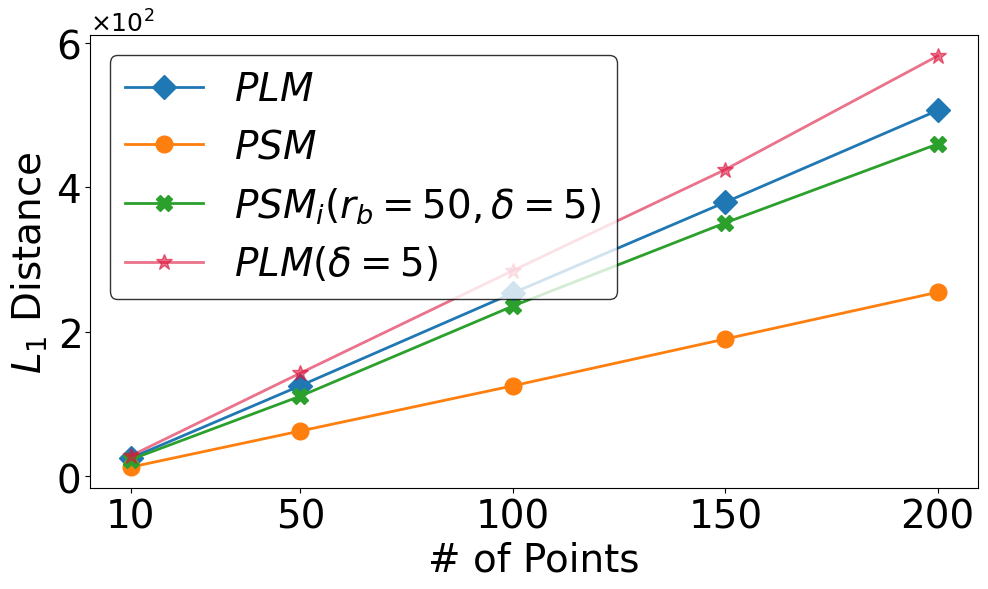

In [92]:
#import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l1_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l1_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l1_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l1_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_1$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

# Saving the plot as a high-definition PNG
pathpng = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\png\\uci_l1_distance_e=1'

plt.savefig(pathpng, dpi=300, bbox_inches='tight')

#Saving the plot as an SVG
pathsvg = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\svg\\uci_l1_distance_e=1'
plt.savefig(pathsvg, format='svg', bbox_inches='tight')

In [93]:
df_laplace5 = pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\laplace\\merged_laplace_5.csv')

  # Add more sizes as needed
averages_l2_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplace5.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_laplace[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_laplace[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l2_laplace.items()}
overall_averages_l1_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l1_laplace.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_laplace = list(overall_averages_l2_laplace.values())
overall_averages_l1_laplace = list(overall_averages_l1_laplace.values())
# This will be your list of overall averages
#print(overall_averages_l2_laplace)
#print(overall_averages_l1_laplace)



################################################

df_staircase5 = pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\staircase\\merged_staircase_5.csv')

  # Add more sizes as needed
averages_l2_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_staircase5.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_staircase[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_staircase[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l2_staircase.items()}
overall_averages_l1_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l1_staircase.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_staircase = list(overall_averages_l2_staircase.values())
overall_averages_l1_staircase = list(overall_averages_l1_staircase.values())
# This will be your list of overall averages
#print(overall_averages_l2_staircase)
#print(overall_averages_l1_staircase)

#####################################################

df_our_bl_50delta5_5 = pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\our_bl_50_delta_5\\merged_our_bl_50_delta_5_5.csv')

  # Add more sizes as needed
averages_l2_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_our_bl_50delta5_5.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_our_bl_50_delta_5[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_our_bl_50_delta_5[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_our_bl_50_delta_5.items()}
overall_averages_l1_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_our_bl_50_delta_5.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_our_bl_50_delta_5 = list(overall_averages_l2_our_bl_50_delta_5.values())
overall_averages_l1_our_bl_50_delta_5 = list(overall_averages_l1_our_bl_50_delta_5.values())
# This will be your list of overall averages
#print(overall_averages_l2_our_bl_50_delta_5)
#print(overall_averages_l1_our_bl_50_delta_5)

#################################

df_laplaceDelta5_5= pd.read_csv('C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\laplace_delta_5\\merged_laplace_delta_5_5.csv')

  # Add more sizes as needed
averages_l2_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplaceDelta5_5.groupby('identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_LaplaceDelta_5_01[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_LaplaceDelta_5_01[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_LaplaceDelta_5_01.items()}
overall_averages_l1_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_LaplaceDelta_5_01.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_LaplaceDelta_5_01 = list(overall_averages_l2_LaplaceDelta_5_01.values())
overall_averages_l1_LaplaceDelta_5_01 = list(overall_averages_l1_LaplaceDelta_5_01.values())
# This will be your list of overall averages
#print(overall_averages_l2_LaplaceDelta_5_01)
#print(overall_averages_l1_LaplaceDelta_5_01)

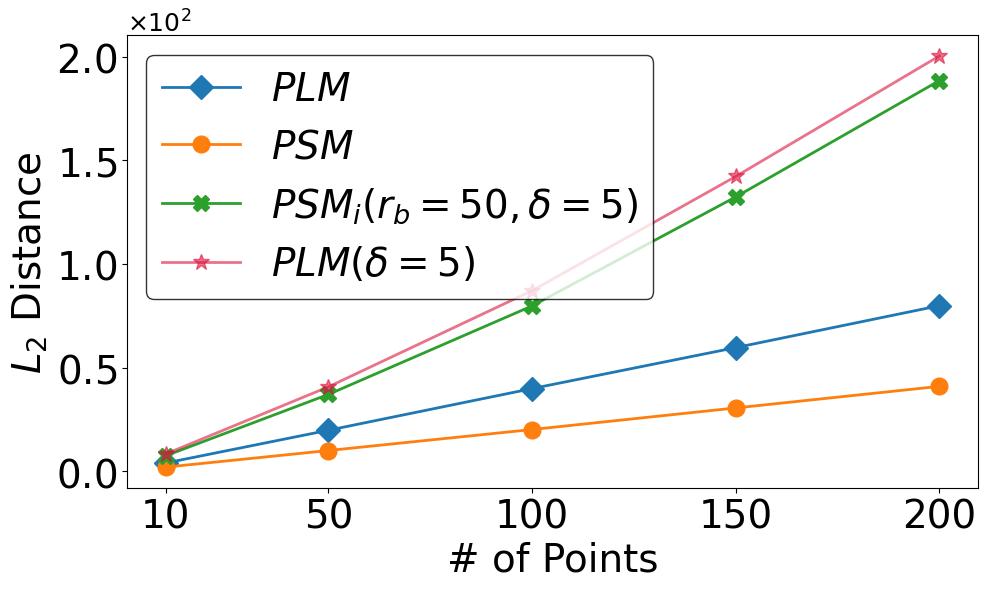

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l2_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l2_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l2_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l2_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_2$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()



pathpng = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\png\\uci_l2_distance_e=5'

plt.savefig(pathpng, dpi=300, bbox_inches='tight')


pathsvg = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\svg\\uci_l2_distance_e=5'
plt.savefig(pathsvg, format='svg', bbox_inches='tight')

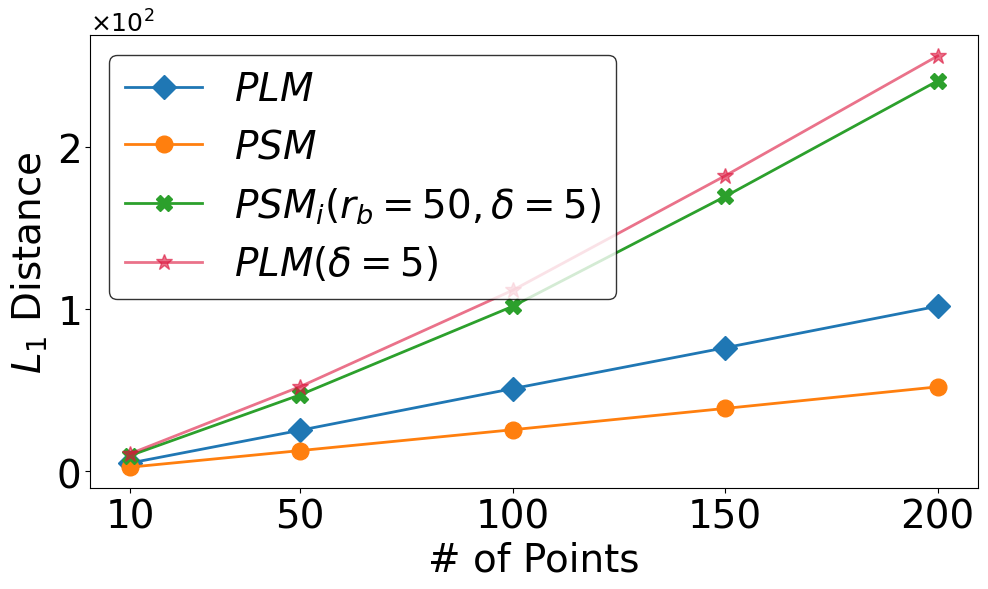

In [95]:
#import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l1_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l1_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l1_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l1_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_1$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

# Saving the plot as a high-definition PNG
pathpng = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\png\\uci_l1_distance_e=5'

plt.savefig(pathpng, dpi=300, bbox_inches='tight')

#Saving the plot as an SVG
pathsvg = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\svg\\uci_l1_distance_e=5'
plt.savefig(pathsvg, format='svg', bbox_inches='tight')